## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

from math import *

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
plt.figure?

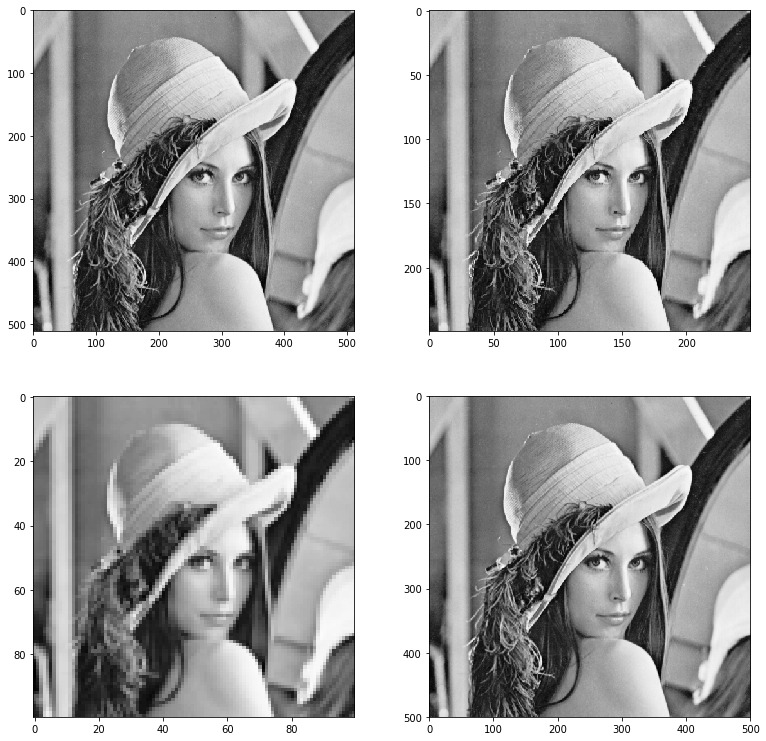

In [3]:
satpath = "./images/lena-grey.bmp"
lena1 = img_as_ubyte(io.imread(satpath, as_grey=True))
lena2 = misc.imresize(lena1, (250,250), interp='nearest')
lena3 = misc.imresize(lena1, (100,100), interp='bilinear')
lena4 = misc.imresize(lena1, (500,500), interp='bicubic')
plt.figure(figsize = (2^15,2^15))
plt.subplot(221)
plt.imshow(lena1, cmap = cm.Greys_r)
plt.subplot(222)
plt.imshow(lena2, cmap = cm.Greys_r)
plt.subplot(223)
plt.imshow(lena3, cmap = cm.Greys_r)
plt.subplot(224)
plt.imshow(lena4, cmap = cm.Greys_r)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [4]:
def simple_blend(img1, img2, perc):
    w,h,d= img1.shape
    w2,h2,d = img2.shape
    if (w != w2 or h != h2):
        im2 = misc.imresize(img2, (w1,w2), interp='bicubic')
    out = np.zeros(img1.shape)
    
    for i in range(0,w):
        for j in range(0,h):
            if (i < ceil(w/2)):
                out[i,j] = img1[i][j]
            else:
                out[i,j] = img2[i][j]
    return out            

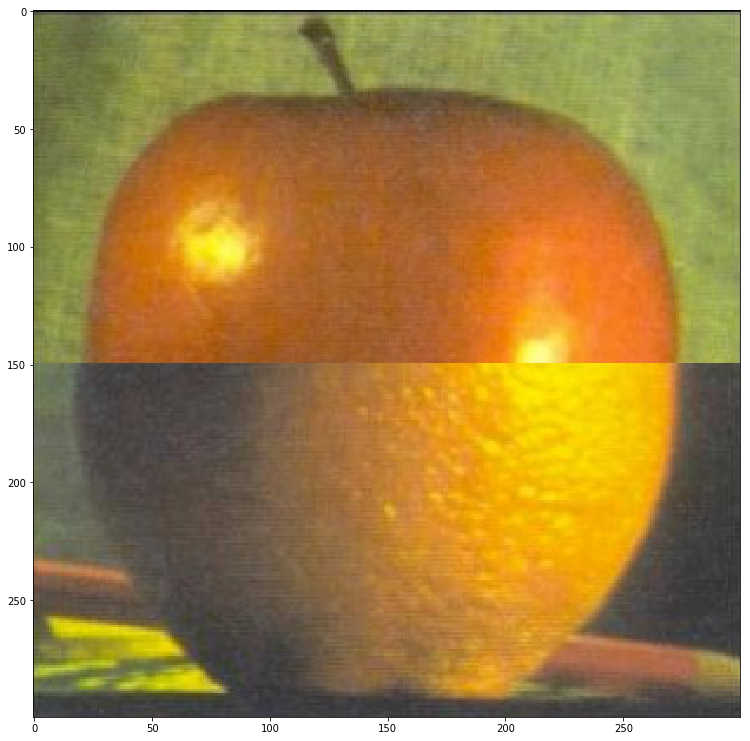

In [5]:
apple = img_as_float(io.imread("./images/apple.jpeg"))
orange = img_as_float(io.imread("./images/orange.jpeg"))

blend= simple_blend(apple, orange,10)
plt.figure(figsize = (2^15,2^15))
plt.imshow(blend)

In [20]:
def alpha_blend(im1, im2, perc):
    w,h,d = im1.shape
    w2,h2,d = im2.shape
    if (w != w2 or h != h2):
        im2 = misc.imresize(im2, (w1,w2), interp='bicubic')
    interv = ceil(w*(0.01*perc))
    out = np.zeros(im1.shape)
    alpha = np.arange(0,interv)/(interv-1)
    for i in range(0,w):
        for j in range(0,h):
            if (i < ceil(w/2) - ceil(interv/2)):
                out[i,j] = im1[i][j]
            elif (i >= floor(w/2) + ceil(interv/2)):
                out[i,j] = im2[i][j]
            else:
                out[i,j] = im2[i][j]*alpha[i - ceil(w/2) - ceil(interv/2)] + (1-alpha[i -ceil(w/2) - ceil(interv/2)])*im1[i][j]
    return out            

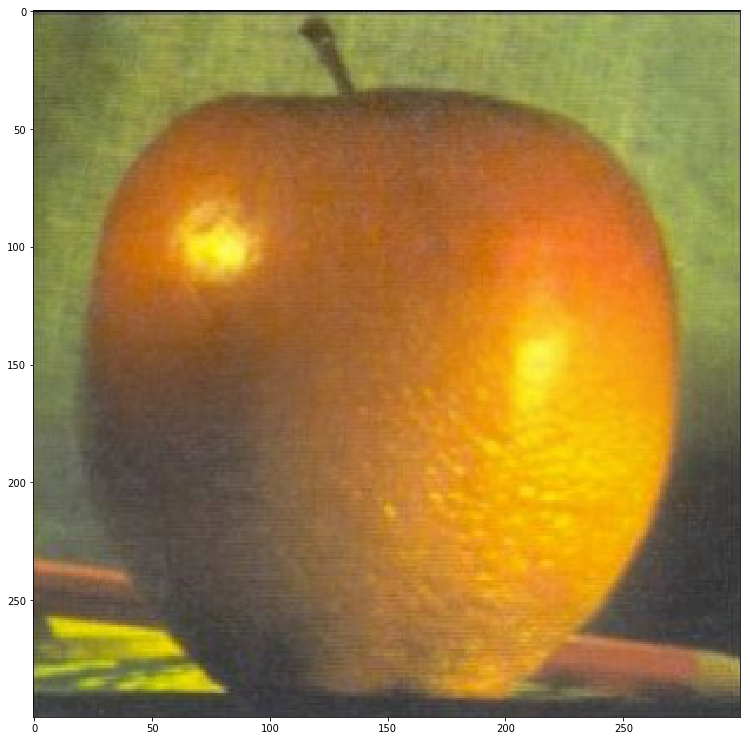

In [21]:
apple = img_as_float(io.imread("./images/apple.jpeg"))
orange = img_as_float(io.imread("./images/orange.jpeg"))

blend= alpha_blend(apple, orange,30)
plt.figure(figsize = (2^15,2^15))
plt.imshow(blend)